In [1]:
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
import numpy as np
import geopandas as gp
from matplotlib.pyplot import plot
import rasterio.mask
import matplotlib.pyplot as plt
from utils import *

lakes_train_test = "/data1/malto/sigspatial/lakes_regions.gpkg"
lakes_regions_path = "/data1/malto/sigspatial/lake_polygons_training.gpkg"
regions = gp.read_file(lakes_train_test)
lakes_regions = gp.read_file(lakes_regions_path)


In [2]:
regions.iloc[0]

region_num                                                    1
geometry      POLYGON ((-5449321.890779544 10875536.20759527...
Name: 0, dtype: object

In [3]:
type(regions)

geopandas.geodataframe.GeoDataFrame

In [4]:
regions

,region_num,geometry
0,1,"POLYGON ((-5449321.891 10875536.208, -5484512...."
1,2,"POLYGON ((-5581347.050 10549567.616, -5667660...."
2,3,"POLYGON ((-5677516.471 10248298.652, -5678009...."
3,4,"POLYGON ((-5678009.204 9927217.104, -5677904.5..."
4,5,"POLYGON ((-2366209.810 15614995.673, -2476111...."
5,6,"POLYGON ((-3526251.976 14894948.043, -3462201...."


POLYGON ((-5581347.050005112 10549567.616353689, -5667660.868274971 10327340.707036113, -5677913.231921792 10298731.070643295, -5677774.686467102 10279103.797895994, -5677516.470607181 10248298.652226266, -5541262.803756714 10222803.11095712, -5371294.774797944 10236754.243969927, -5362998.3263709275 10239286.844016068, -5345095.463975784 10238151.540547108, -5318372.16693718 10239723.499196438, -5301080.621794554 10232300.36113016, -5127153.870551314 10252908.410715882, -5106320.016359595 10547870.580196649, -5266737.691858498 10549290.18931927, -5310927.196111876 10555665.354952661, -5317564.35485349 10545622.285804167, -5379394.728393789 10541779.720216917, -5408825.287550683 10552870.761798298, -5445416.991665632 10554093.396303331, -5495108.351191664 10551298.803148966, -5517901.751606944 10548067.554814234, -5563750.545545724 10547543.56859779, -5581347.050005112 10549567.616353689))


/tmp/ipykernel_775211/3685320114.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elem = regions.iloc[1][1]


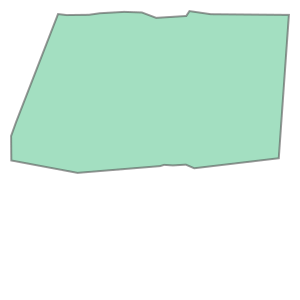

In [5]:
elem = regions.iloc[1][1]
print(elem)
elem

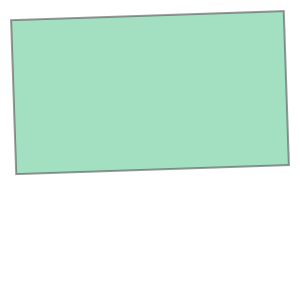

In [6]:
rectangle = elem.minimum_rotated_rectangle
rectangle = gp.GeoSeries(rectangle)
rectangle.iloc[0]

In [7]:
A = shapely.Point(xa, ya)

NameError: name 'xa' is not defined

In [8]:
import shapely
num_points = 10
dim = 100_000
A = rectangle.sample_points(1)
print(A)
B = A.translate(xoff=dim, yoff=0.0, zoff=0.0)
C = A.translate(xoff=dim, yoff=dim, zoff=0.0)
D = A.translate(xoff=0.0, yoff=dim, zoff=0.0)

poly = shapely.Polygon((A[0], B[0], C[0], D[0]))
type(poly)

0    POINT (-5148348.952 10553173.992)
Name: sampled_points, dtype: geometry


shapely.geometry.polygon.Polygon

307912


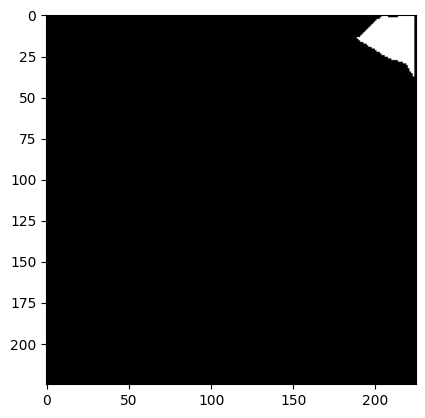

In [16]:
img_region_path = Path("/data1/malto/sigspatial/train_label/")
print(len(os.listdir(img_region_path)))
for i in range(2100, len(os.listdir(img_region_path))):
    img = os.listdir(img_region_path)[i]
    img_region = rasterio.open(img_region_path / img)
    img_array = img_region.read()
    if img_array.max() != 0:
        break
plt.imshow(np.transpose(img_array, ((1, 2, 0))))

In [19]:
ToTensor()(np.transpose(img_array, ((1, 2, 0))))

tensor([[[0.9137, 0.9176, 0.9137,  ..., 0.4706, 0.4549, 0.0000],
         [0.9098, 0.9176, 0.9176,  ..., 0.4431, 0.4157, 0.0000],
         [0.9098, 0.9098, 0.9137,  ..., 0.4314, 0.4157, 0.0000],
         ...,
         [0.9176, 0.9176, 0.9137,  ..., 0.9137, 0.9137, 0.0000],
         [0.9137, 0.9137, 0.9176,  ..., 0.9059, 0.9098, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.9098, 0.9137, 0.9137,  ..., 0.6824, 0.6784, 0.0000],
         [0.9098, 0.9137, 0.9176,  ..., 0.6706, 0.6588, 0.0000],
         [0.9098, 0.9059, 0.9098,  ..., 0.6431, 0.6392, 0.0000],
         ...,
         [0.9137, 0.9176, 0.9137,  ..., 0.9137, 0.9137, 0.0000],
         [0.9098, 0.9137, 0.9098,  ..., 0.9020, 0.9137, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.9137, 0.9176, 0.9137,  ..., 0.7686, 0.7647, 0.0000],
         [0.9098, 0.9176, 0.9176,  ..., 0.7608, 0.7490, 0.0000],
         [0.9137, 0.9098, 0.9137,  ..., 0.7412, 0.7373, 0.

307912


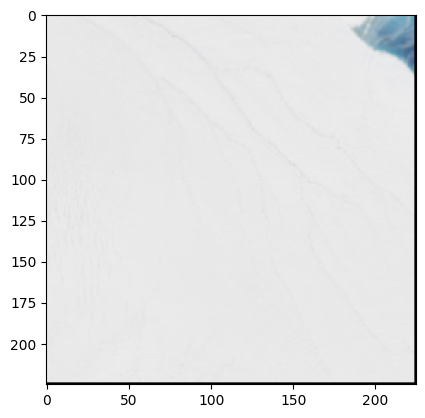

In [17]:
img_region_path = Path("/data1/malto/sigspatial/train_image/")
print(len(os.listdir(img_region_path)))
#img = os.listdir(img_region_path)[2000]
img_region = rasterio.open(img_region_path / img)
img_array = img_region.read()
    
plt.imshow(np.transpose(img_array, ((1, 2, 0))))

In [70]:
img

'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_3.tif_-5429741.735642477_10018325.88628408.tif'

In [11]:
img_array.shape

(3, 22641, 28235)

In [12]:
rect = get_external_rectangle(regions=regions, num_region=1)

/home/fborra/sigspatialcup2023/utils.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return gp.GeoSeries(regions.iloc[num_region][1].minimum_rotated_rectangle)


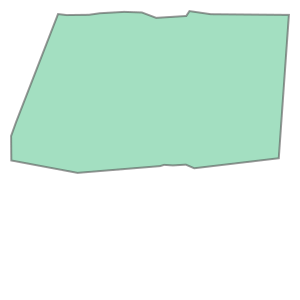

In [21]:
regions.iloc[1]['geometry']

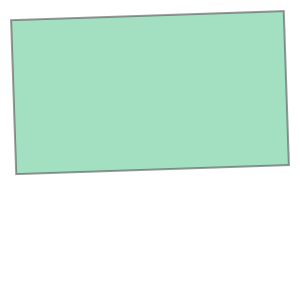

In [16]:
rect[0]

In [9]:
from utils import get_square

while True:
    poly = get_square(rectangle)
    out_image, out_transform = rasterio.mask.mask(img_region, [poly], crop=True)
    if not is_valid(out_image):
        continue
    else:
        break

0 723
3 736


In [24]:
lakes_regions[(lakes_regions['image'] == "Greenland26X_22W_Sentinel2_2019-06-03_05.tif") & (lakes_regions['region_num'] == 2)]

,image,region_num,geometry
0,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5557392.360 10529124.209, -5557430...."
1,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5515504.868 10233656.876, -5515543...."
2,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5515199.120 10446801.530, -5515160...."
3,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5502090.170 10342694.297, -5502090...."
4,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5500714.304 10485784.414, -5500714...."
...,...,...,...
383,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5451374.202 10248256.349, -5451297...."
384,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5460508.427 10242408.916, -5460470...."
385,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5462304.697 10241606.327, -5462304...."
386,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5458253.534 10239427.872, -5458253...."


In [34]:
lake_geom = lakes_regions[lakes_regions['region_num'] == 2]['geometry']

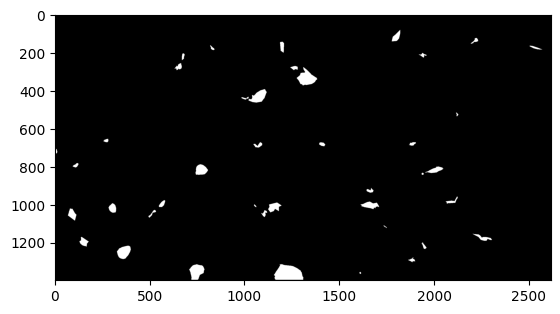

In [37]:

img_trial = rasterio.open(img_trial_path)

out_image, _ = rasterio.mask.mask(img_trial, lake_geom)
out_image[out_image != 0] = 255

plt.imshow(np.transpose(out_image, ((1, 2, 0))))

In [28]:
img_region

<open DatasetReader name='/data1/malto/train/train_img1.tif' mode='r'>

In [ ]:
out_image

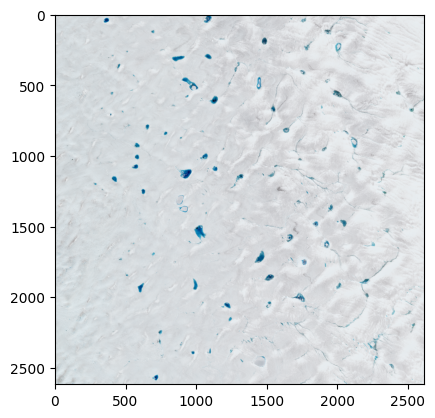

In [14]:
import matplotlib.pyplot as plt

plt.imshow(np.transpose(out_image, ((1, 2, 0))))

In [ ]:
lake

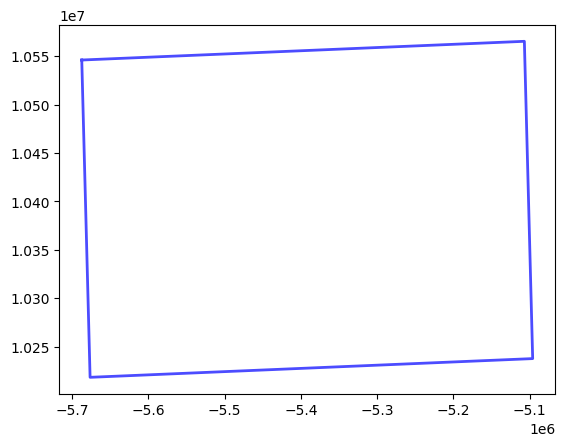

In [118]:
import matplotlib.pyplot as plt

# extract x-y coordinates
x, y = rectangle.iloc[0].exterior.xy
# xx, yy = poly.exterior.xy


# Plot the polygon
plt.plot(x, y, color='blue', alpha=0.7, linewidth=2, label='Polygon')
# plt.plot(x, y, color='blue', alpha=0.7, linewidth=2, label='Polygon')
# # plot original polygon 
# plt.plot(xx, yy, color='green', alpha=0.7, linewidth=2, label='Square')
# # Plot the point 
# plt.plot(A.x, A.y, 'ro', label='Point')

In [119]:
img_region_path = "/data1/malto/train/train_img1.tif"
img_region = rasterio.open(img_region_path)



In [120]:
img_region

<open DatasetReader name='/data1/malto/train/train_img1.tif' mode='r'>

In [121]:
out_image, out_transform = rasterio.mask.mask(img_region, [poly], crop=True)
out_meta = img_region.meta

# Update the metadata for the output file
out_meta.update({"driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform})

# Save the clipped image to a new .tif file
output_filename = f'trial_image.tif'
with rasterio.open(output_filename, "w", **out_meta) as dest:
    dest.write(out_image)

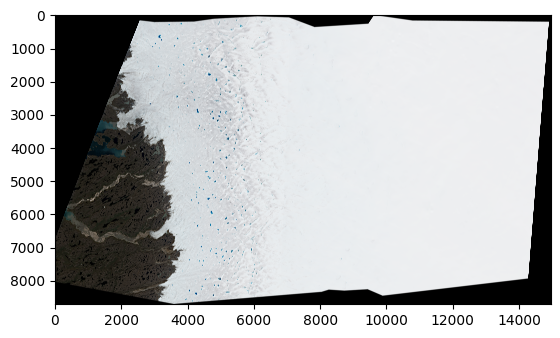

In [122]:
from utils import plot_image

plot_image("/data1/malto/train/train_img1.tif")

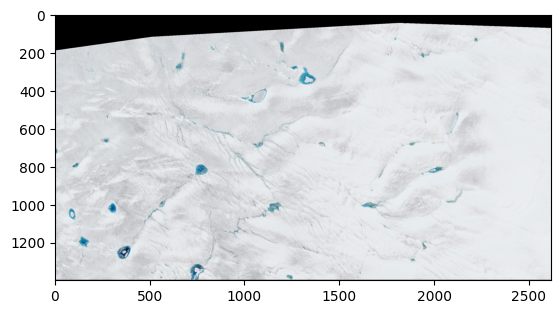

In [123]:
import matplotlib.pyplot as plt
plt.imshow(np.transpose(out_image, ((1, 2, 0))))

In [59]:
regions.iloc[1][1]
type(regions.iloc[1][1])

shapely.geometry.polygon.Polygon